## Streamlit - Criando dashboards

In [47]:
import yfinance as yf
import datetime as dt
from plotly import graph_objs as go
from plotly.subplots import make_subplots

In [4]:
start = '2015-01-01'
today = dt.date.today().strftime('%Y-%m-%d')

In [5]:
start, today

('2015-01-01', '2021-08-27')

In [7]:
ticker = 'GOOG'
data = yf.download(ticker, start, today)

[*********************100%***********************]  1 of 1 completed


In [21]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.782110,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.083958,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.086227,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.423975,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.362394,237458000


<AxesSubplot:xlabel='Date'>

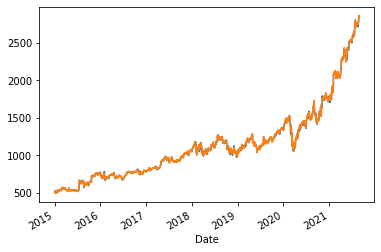

In [11]:
data.Open.plot()
data.Close.plot()

In [22]:
def extract_data(ticker, start, end):
    data = yf.download(ticker, start, end)
    data = data.reset_index()
    return data

In [37]:
data = extract_data('AAPL', start=start, end=today)
data2 = extract_data('GOOG', start=start, end=today)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.782110,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.083958,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.086227,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.423975,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.362394,237458000


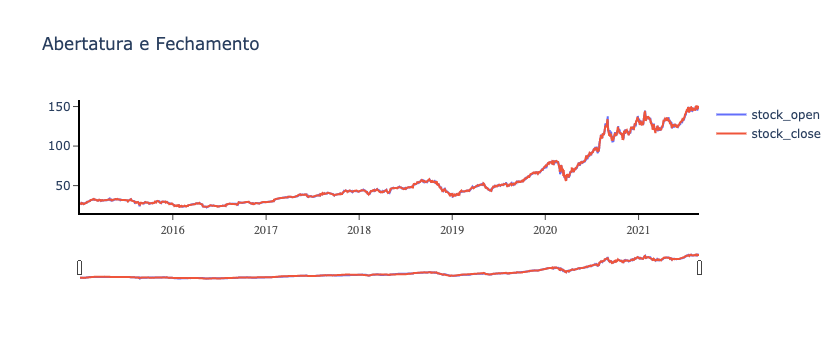

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data['Date'], y=data['Open'], name='stock_open'))

fig.add_trace(go.Scatter(
    x=data['Date'], y=data['Close'], name='stock_close'))

fig.layout.update(title_text='Abertatura e Fechamento',
                 xaxis_rangeslider_visible=True)

fig.layout.update(
    xaxis=dict(
            showline=True,
#             showgrid=False,
            showticklabels=True,
            linecolor='rgb(0, 0, 0)',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Roboto',
                size=12,
                color='rgb(82,82,82)'),
        ),
    yaxis=dict(
            showline=True,
            showgrid=False,
            zeroline=True,
            showticklabels=True,
            ticks='outside',
            linecolor='rgb(0, 0, 0)',
            linewidth=2
        ),
    plot_bgcolor='rgb(255,255,255)',  # plot_bgcolor='white'   
)
fig

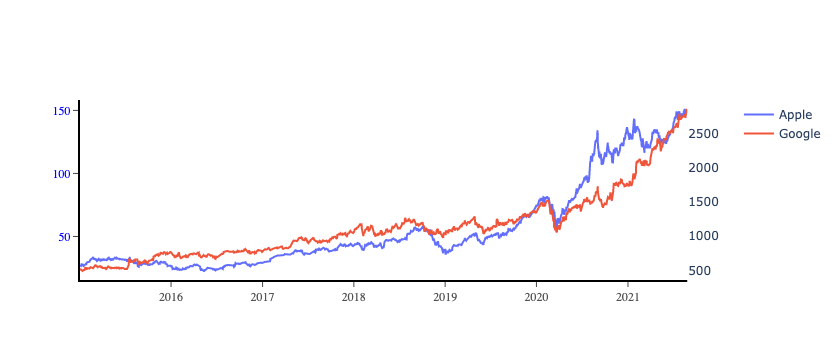

In [51]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=data['Date'], y=data['Close'], name='Apple'))


fig.add_trace(go.Scatter(
    x=data2['Date'], y=data2['Close'], name='Google'),
             secondary_y=True)
fig.update_layout(
    xaxis=dict(
            showline=True,
#             showgrid=False,
            showticklabels=True,
            linecolor='rgb(0, 0, 0)',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Roboto',
                size=12,
                color='rgb(82,82,82)'),
        ),
    yaxis=dict(
            showline=True,
            showgrid=False,
            zeroline=True,
            showticklabels=True,
            ticks='outside',
            linecolor='rgb(0, 0, 0)',
            linewidth=2,
            tickfont=dict(
                family='Roboto',
                size=12,
                color='rgb(0,0,255)')
        ),
    plot_bgcolor='rgb(255,255,255)',  # plot_bgcolor='white'   
)
fig